In [ ]:
import yfinance as yf

itc_stock = yf.Ticker("ITC.NS")  # 'ITC.NS' for ITC listed on NSE (National Stock Exchange of India)

live_data = itc_stock.history(period="1d", interval="1m")

print(live_data.tail(1))  # Prints the most recent data point


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-14 15:29:00+05:30  491.950012  492.700012  491.950012  492.200012   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2024-08-14 15:29:00+05:30   43732        0.0           0.0  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math


def prepare_data(data, time_steps):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:(i + time_steps), 0])
        y.append(scaled_data[i + time_steps, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model






In [ ]:
def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data['Close']

In [ ]:
def make_predictions(model, X, scaler):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    return predictions

In [ ]:
def plot_results(actual, predicted):
    plt.figure(figsize=(16,8))
    plt.plot(actual, label='Actual Price')
    plt.plot(predicted, label='Predicted Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [ ]:

ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2023-12-31"
time_steps = 60
train_size = 0.8
data = get_stock_data(ticker, start_date, end_date)
X, y, scaler = prepare_data(data, time_steps)
train_size = int(len(X) * train_size)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = build_model((X_train.shape[1], 1))
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0033 - val_loss: 8.0804e-04
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.7142e-05 - val_loss: 0.0012
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5054e-05 - val_loss: 9.2879e-04
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2780e-05 - val_loss: 9.4412e-04
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1313e-05 - val_loss: 7.6769e-04
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.3834e-05 - val_loss: 6.7100e-04
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0609e-05 - val_loss: 6.6269e-04
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9669e-05 - val_loss: 7.0819e-04
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8234e-05 - val_loss: 7.5209e-04
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6616e-05 - val_loss: 5.8179e-04
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2869e-05 -

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train RMSE: 1.122799024767933
Test RMSE: 3.408485864966934


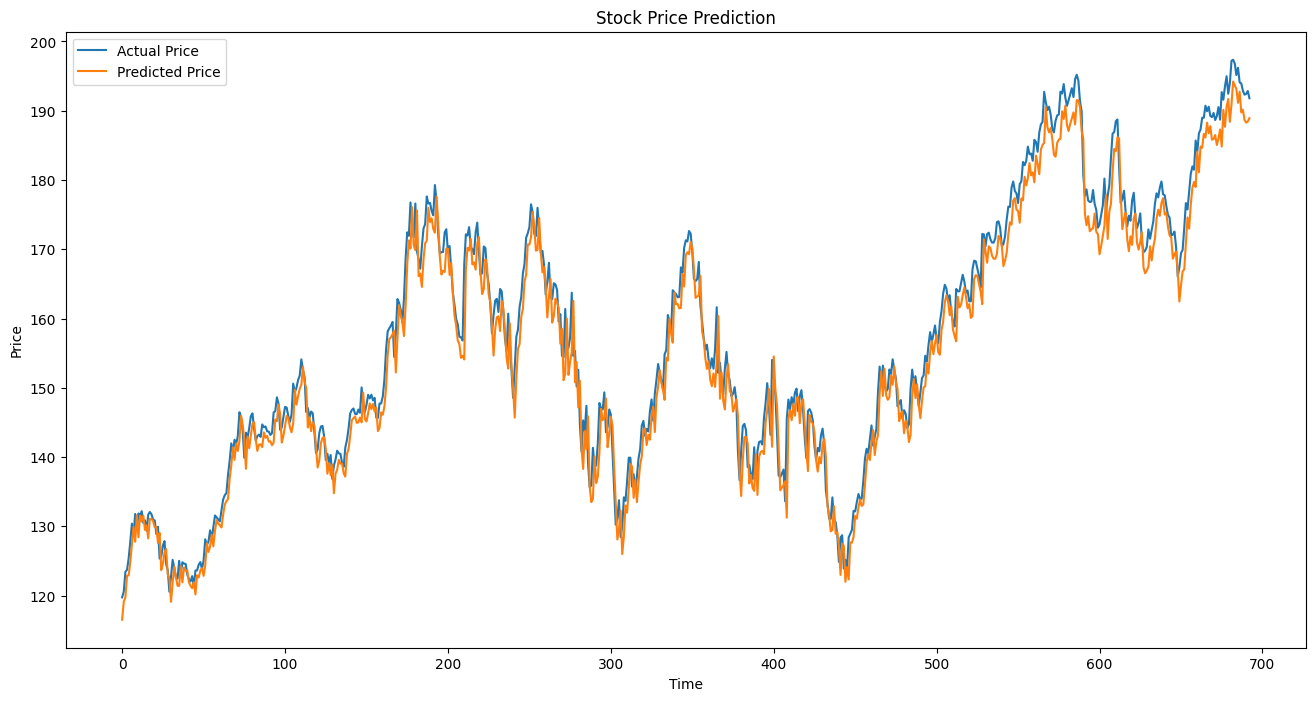

In [ ]:
train_predictions = make_predictions(model, X_train, scaler)
test_predictions = make_predictions(model, X_test, scaler)

train_rmse = math.sqrt(mean_squared_error(data[time_steps:train_size+time_steps], train_predictions))
test_rmse = math.sqrt(mean_squared_error(data[train_size+time_steps:], test_predictions))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

actual_prices = data[train_size+time_steps:].values
plot_results(actual_prices, test_predictions)




In [ ]:
last_60_days = data[-60:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)
next_day_input = last_60_days_scaled.reshape(1, time_steps, 1)
next_day_prediction = model.predict(next_day_input)
next_day_price = scaler.inverse_transform(next_day_prediction)[0, 0]
print(f"Predicted price for next day: {next_day_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted price for next day: 187.58819580078125
